In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
dataset = pd.read_excel("Sample - Superstore (1).xls")

In [3]:
dataset.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [4]:
dataset.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
dataset.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

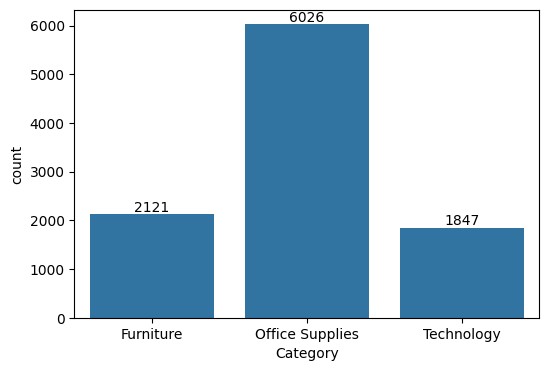

In [24]:
plt.figure(figsize=(6,4))
cat = sns.countplot(data=dataset,x="Category")
for i in cat.containers:
    cat.bar_label(i)
plt.show()

In [26]:
cate_pro = dataset.groupby(["Category"],as_index=False)["Profit"].sum().sort_values(by="Profit",ascending=False)

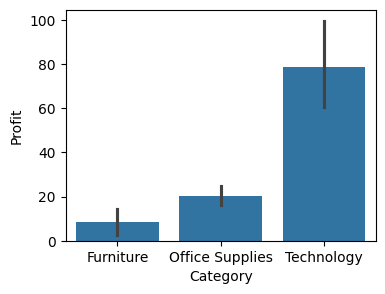

In [28]:
plt.figure(figsize=(4,3))
sns.barplot(data=dataset,x="Category",y="Profit")
plt.show()

In [29]:
dataset.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

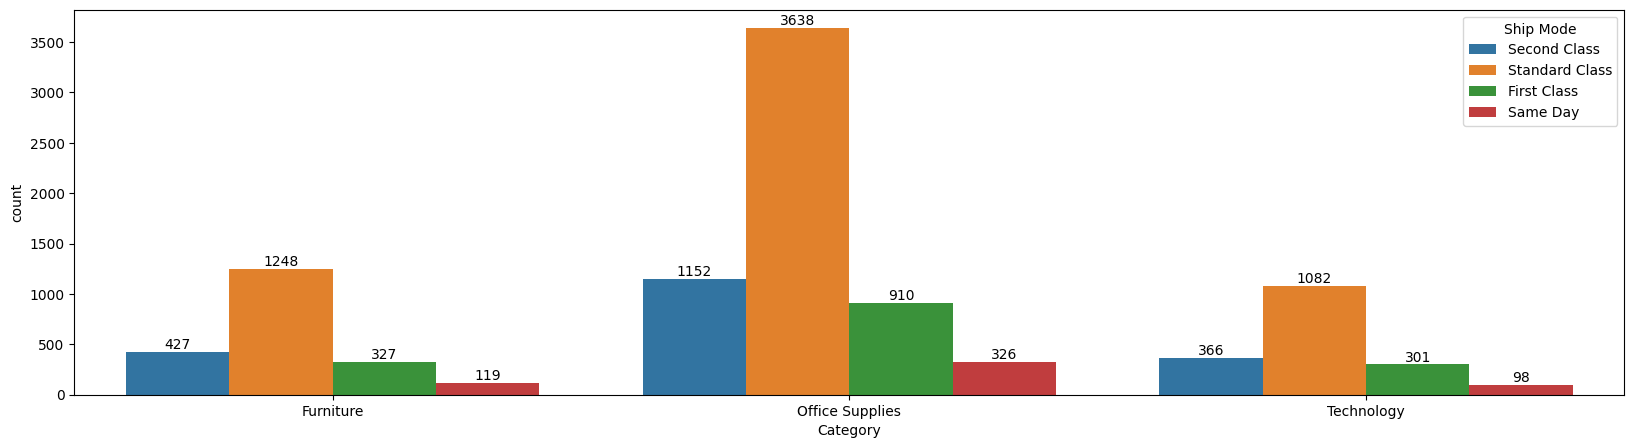

In [38]:
plt.figure(figsize=(20,5))
con = sns.countplot(data=dataset,x="Category" , hue ="Ship Mode")
for i in con.containers:
    con.bar_label(i)
plt.show()

In [40]:
region = dataset.groupby(["Region"],as_index=False)["Profit"].sum().sort_values(by="Profit", ascending=False)

In [41]:
region

,Region,Profit
3,West,108418.4489
1,East,91522.7800
2,South,46749.4303
0,Central,39706.3625


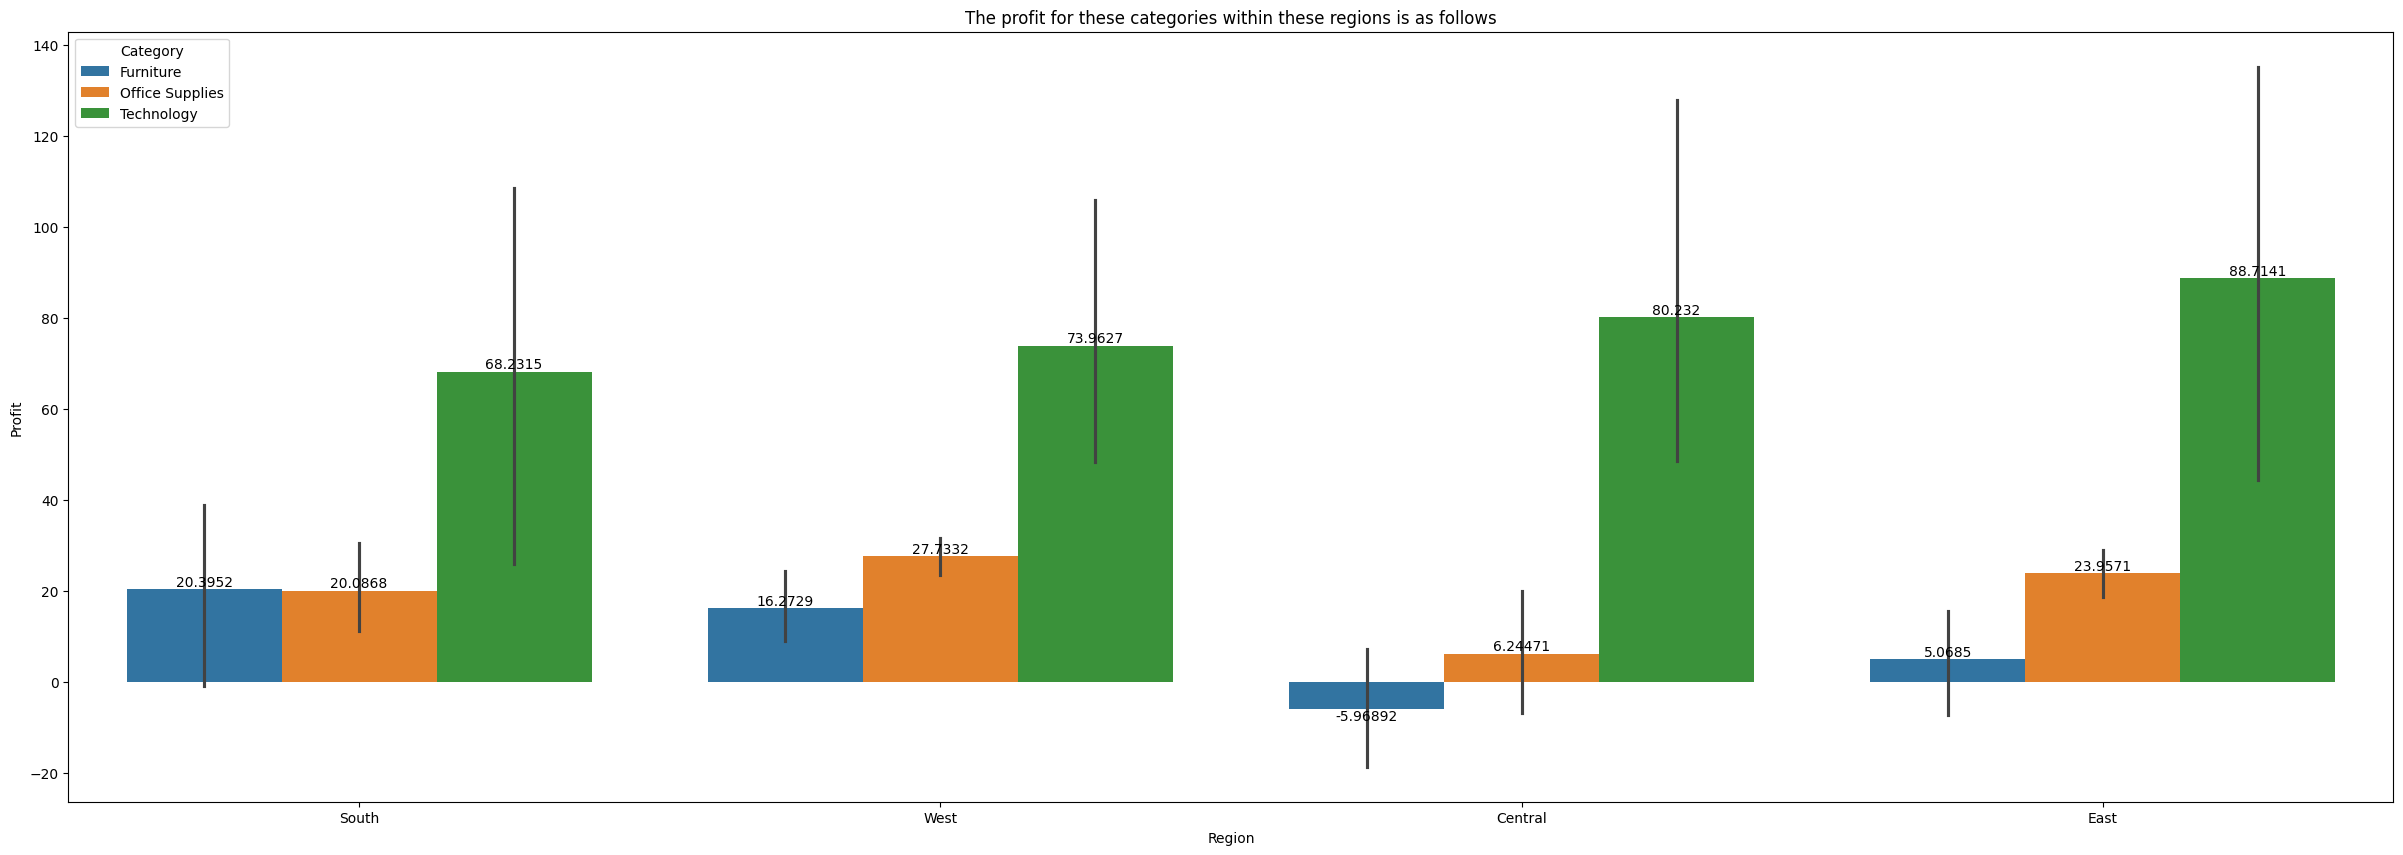

In [50]:
plt.figure(figsize=(30,10))
c = sns.barplot(data=dataset,x="Region" , y="Profit" , hue = "Category")
for i in c.containers:
    c.bar_label(i)
plt.title("The profit for these categories within these regions is as follows")
plt.show()

# Discount ANALYSIS

In [3]:
df = dataset

In [4]:
df["Discount"].isnull().mean()*100

0.0

<Axes: xlabel='Discount', ylabel='Count'>

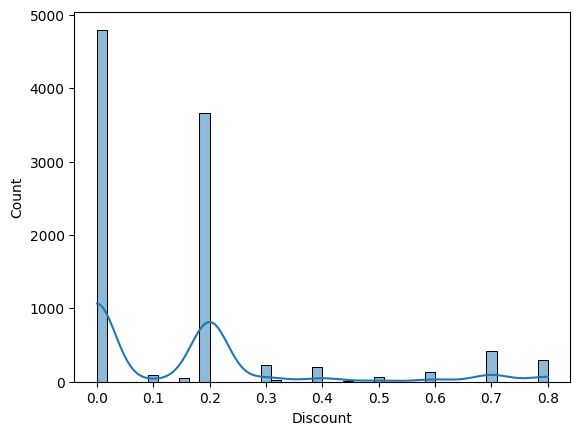

In [5]:
sns.histplot(data = df , x="Discount" , kde = True)

<Axes: ylabel='Density'>

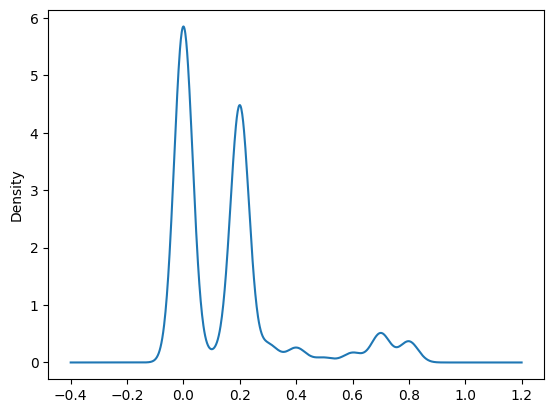

In [6]:
df["Discount"].plot(kind="kde")

<Axes: ylabel='Discount'>

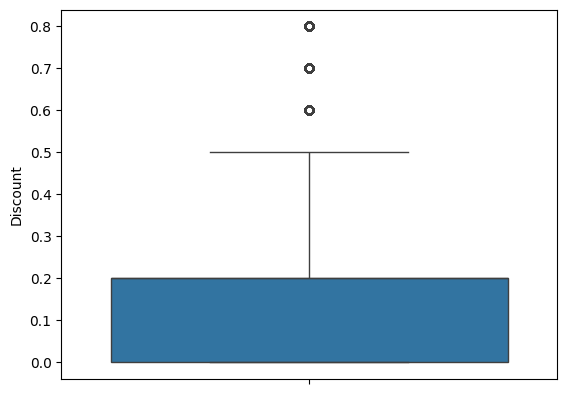

In [7]:
sns.boxplot(df["Discount"])

In [8]:
Q1 = df['Discount'].quantile(0.25)
Q3 = df['Discount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Discount'] >= lower_bound) & (df['Discount'] <= upper_bound)]


<Axes: ylabel='Discount'>

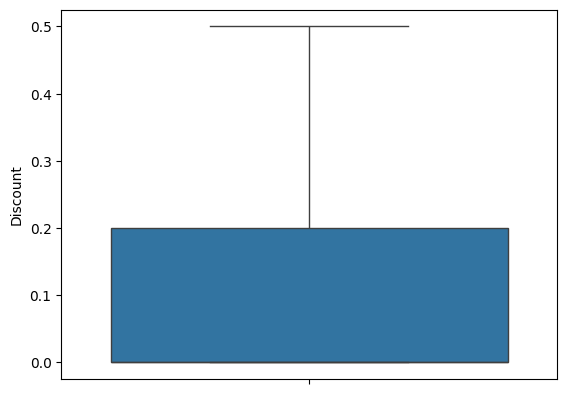

In [9]:
sns.boxplot(df["Discount"])

<Axes: ylabel='Density'>

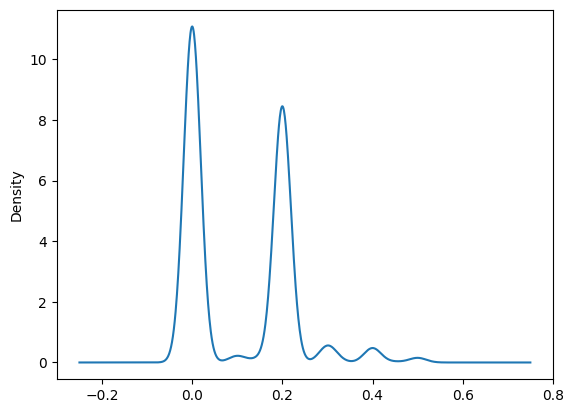

In [10]:
df["Discount"].plot(kind="kde")

In [47]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [15]:
df["Order ID"].duplicated().sum()

4381

In [16]:
df["Discount"].value_counts()

Discount
0.00    4798
0.20    3657
0.30     227
0.40     206
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

In [17]:
df["Discount"].skew()

0.6749234084305148

In [18]:
df.groupby("Discount")["Sales"].mean()

Discount
0.00    226.742074
0.10    578.397351
0.15    529.971567
0.20    209.076940
0.30    454.742974
0.32    536.794770
0.40    565.134874
0.45    498.634000
0.50    892.705152
Name: Sales, dtype: float64

In [21]:
df['year'] = df['Order Date'].dt.year  
yearly_discount = df.groupby('year')['Discount'].mean()


C:\Users\HP\AppData\Local\Temp\ipykernel_11620\1878102087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Order Date'].dt.year


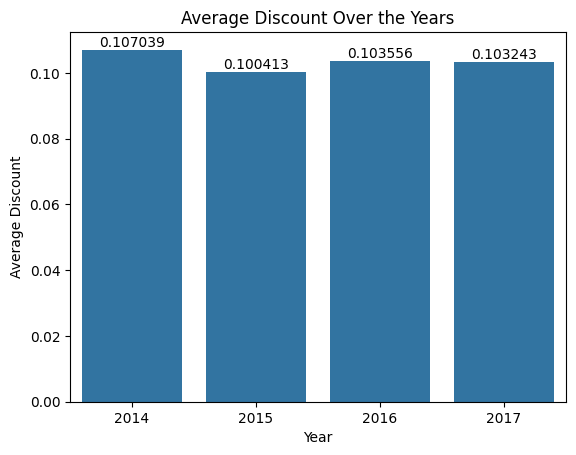

In [76]:
h = sns.barplot(x=yearly_discount.index, y=yearly_discount.values)
for i in h.containers:
    h.bar_label(i)
plt.title('Average Discount Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Discount')
plt.show()

*In 2014, the highest discount was given,


#followed by the lowest in 2015, with 2016 seeing a similar increase to 2014, and 2017 maintaining almost the same discount as 2016.

#Inconsistent Discounting Strategy: In 2015, the discount was significantly lower, which could have affected customer retention or sales growth.
Lack of Clear Discount Policy: High discounts in 2014 and 2016 suggest an inconsistent strategy, potentially confusing customers.

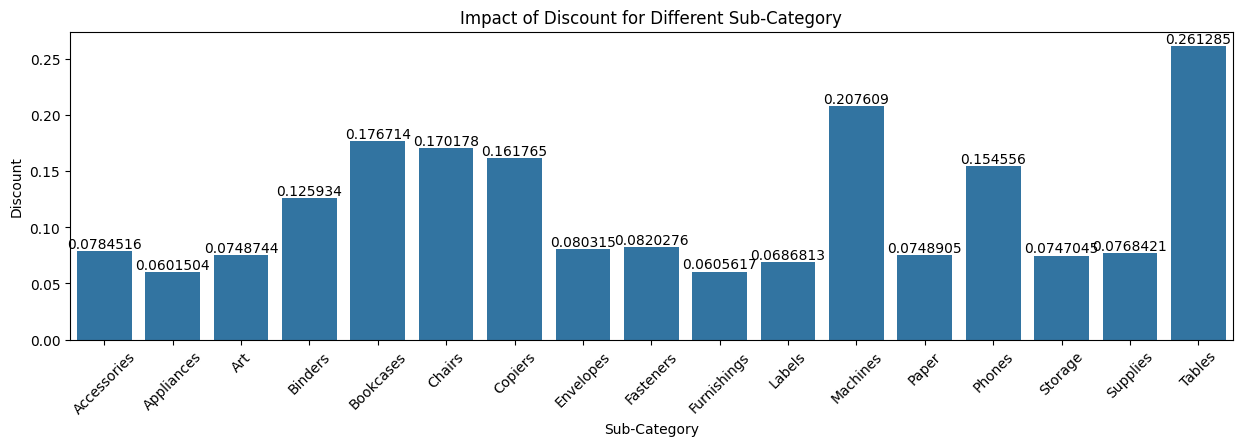

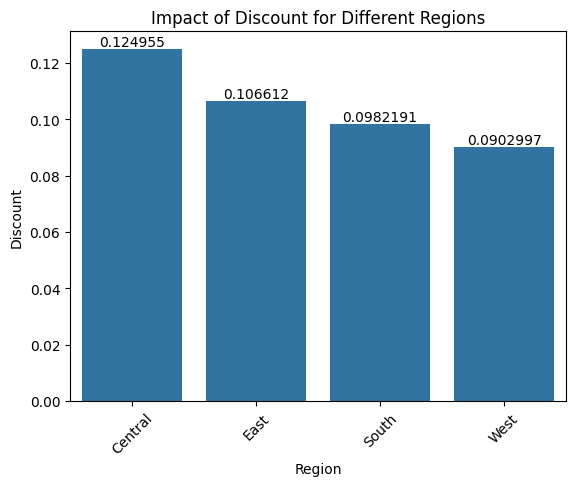

In [92]:
product_discount = df.groupby('Sub-Category')['Discount'].mean()

plt.figure(figsize=(15,4))
h = sns.barplot(x=product_discount.index, y=product_discount.values)
for i in h.containers:
    h.bar_label(i)
plt.title('Impact of Discount for Different Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Discount')
plt.xticks(rotation=45)
plt.show()

region_discount = df.groupby('Region')['Discount'].mean()

h = sns.barplot(x=region_discount.index, y=region_discount.values)
for i in h.containers:
    h.bar_label(i)
plt.title('Impact of Discount for Different Regions')
plt.xlabel('Region')
plt.ylabel('Discount')
plt.xticks(rotation=45)
plt.show()

In [108]:
product_discount

Sub-Category
Accessories    0.078452
Appliances     0.060150
Art            0.074874
Binders        0.125934
Bookcases      0.176714
Chairs         0.170178
Copiers        0.161765
Envelopes      0.080315
Fasteners      0.082028
Furnishings    0.060562
Labels         0.068681
Machines       0.207609
Paper          0.074891
Phones         0.154556
Storage        0.074704
Supplies       0.076842
Tables         0.261285
Name: Discount, dtype: float64

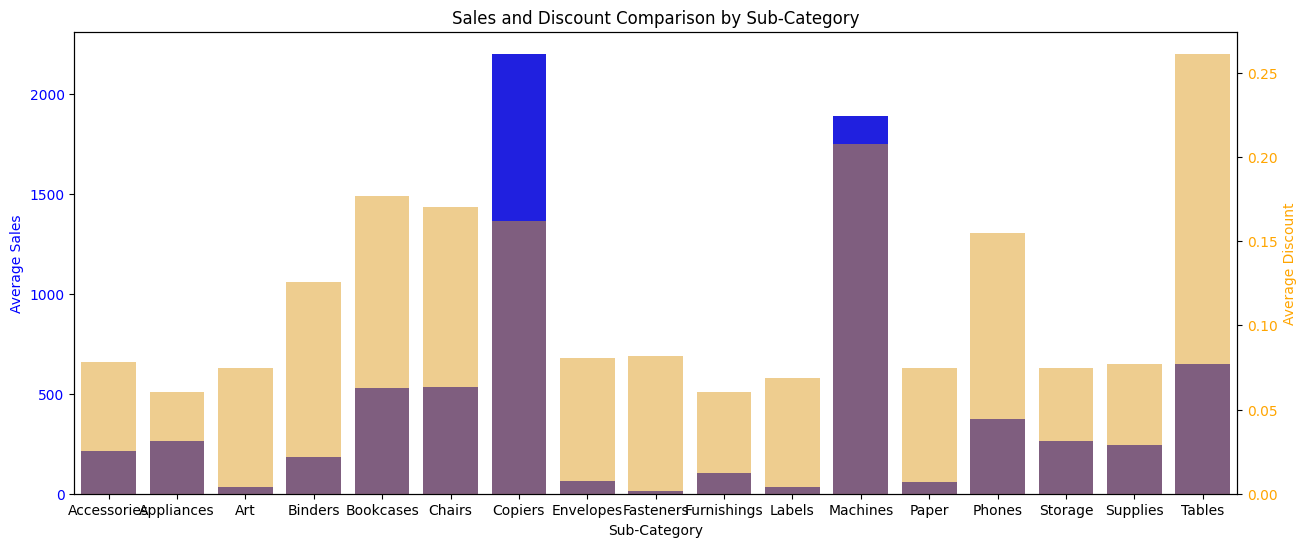

In [119]:
subcategory_sales_discount = df.groupby('Sub-Category').agg(
    average_sales=('Sales', 'mean'),
    average_discount=('Discount', 'mean')
)
fig, ax1 = plt.subplots(figsize=(15, 6))

sns.barplot(x=subcategory_sales_discount.index, 
            y=subcategory_sales_discount['average_sales'], ax=ax1, color='blue')
ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Average Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx() 
sns.barplot(x=subcategory_sales_discount.index, 
            y=subcategory_sales_discount['average_discount'], ax=ax2, color='orange', alpha=0.5)
ax2.set_ylabel('Average Discount', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Sales and Discount Comparison by Sub-Category')

plt.show()

The highest average discount (0.261) was given for tables, but sales are around 648.79. This means high discounts are being offered, but sales are not performing well, which is a concern for the business.

Products like bookcases and chairs are also getting relatively high discounts, but their sales are strong, indicating high demand for these items.

Products like fasteners and labels have low sales and low discounts, showing that these products are not appealing much in the market.

Despite high discounts for tables, there isn’t a significant improvement in sales, which could point to a pricing strategy or demand issue.

Offering high discounts without improving sales suggests that the discount strategy or product positioning needs to be re-evaluated.

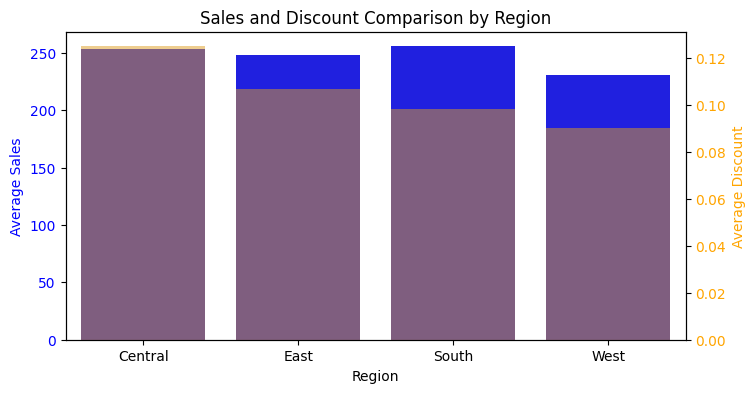

In [23]:
Region_sales_discount = df.groupby('Region').agg(
    average_sales=('Sales', 'mean'),
    average_discount=('Discount', 'mean')
)
fig, ax1 = plt.subplots(figsize=(8,4))

sns.barplot(x=Region_sales_discount.index, 
            y=Region_sales_discount['average_sales'], ax=ax1, color='blue')
ax1.set_xlabel('Region')
ax1.set_ylabel('Average Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx() 
sns.barplot(x=Region_sales_discount.index, 
            y=Region_sales_discount['average_discount'], ax=ax2, color='orange', alpha=0.5)
ax2.set_ylabel('Average Discount', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Sales and Discount Comparison by Region')

plt.show()

#Central Region: Average sales are the highest (253.39) with a high discount (0.125), showing that discounts are positively impacting sales here.

South Region: Sales are high (255.59) even with a low discount (0.098), indicating strong demand without the need for heavy discounts.

East Region: Sales (247.74) and discounts (0.107) are moderate, suggesting that discounts are having a somewhat positive effect.

West Region: Sales are the lowest (230.59) with a low discount (0.090), indicating weak demand, where increasing discounts might not significantly boost sales.